In [ ]:
#Load the libraries

In [2]:
#Libraries for data maninupaltion
import os
import pandas as pd
import numpy as np
#Load the data set
df = pd.read_csv("data.csv")

In [3]:
#Display the first few rows of the dataset
df.head(10)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [ ]:
#Data preprocessing/ data cleanining
#How to handle bad data
#Bad data
#1.empty cells - has no any data entry
#2.wrong formats - e.g mis writing of the date 30/05/2025      30052025
#3.wrong data - unrealistic data e.g  Age 23        -23
#4.duplicates- more entries for the same person

In [4]:
#Empty values/ empty cells
#check for empty values
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [6]:
#Check Wrong formats
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [8]:
#check for non numeric values in the column
for col in["Duration", "Pulse", "Maxpulse", "Calories"]:
    if not pd.to_numeric(df[col], errors="coerce").notnull().all():
     print(f"Non-numeric values found in column: {col}")

Non-numeric values found in column: Calories


In [ ]:
#Wrong data
#check for negative values in numeric columns
for col in["Duration", "Pulse", "Maxpulse", "Calories"]:
    if(df[col] < 0).any():
        print(f"Negative values found in column: {col}")

In [12]:
#Duplicates
duplicates = df.duplicated()
if duplicates. any(): # type: ignore
    print("Duplicates found: ")
    print(df[duplicates])
else:
    print("No duplicates found. ")


Duplicates found: 
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [ ]:
#recommendations for working with bad data
#Remove duplicates in rows not columns
#Correct wrong data
#Convert wrong formats
#Handle fill empty values/ cells

In [13]:
#Fill empty values with mean for numeric columns
for col in ["Duration", "Pulse", "Maxpulse", "Calories"]:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\Renitah\AppData\Local\Temp\ipykernel_15444\854738718.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [14]:
df.head(30)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.100000
1,60,117,145,479.000000
2,60,103,135,340.000000
3,45,109,175,282.400000
4,45,117,148,406.000000
5,60,102,127,300.000000
6,60,110,136,374.000000
7,45,104,134,253.300000
8,30,109,133,195.100000
9,60,98,124,269.000000


In [15]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [18]:
#EDA- Exploratory Data Analysis
#Check the shape of the dataset
print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (169, 4)


In [19]:
#Summary of statitics
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [ ]:
#Data visualization
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 


Text(0.5, 1.0, 'Pulse Distribution')

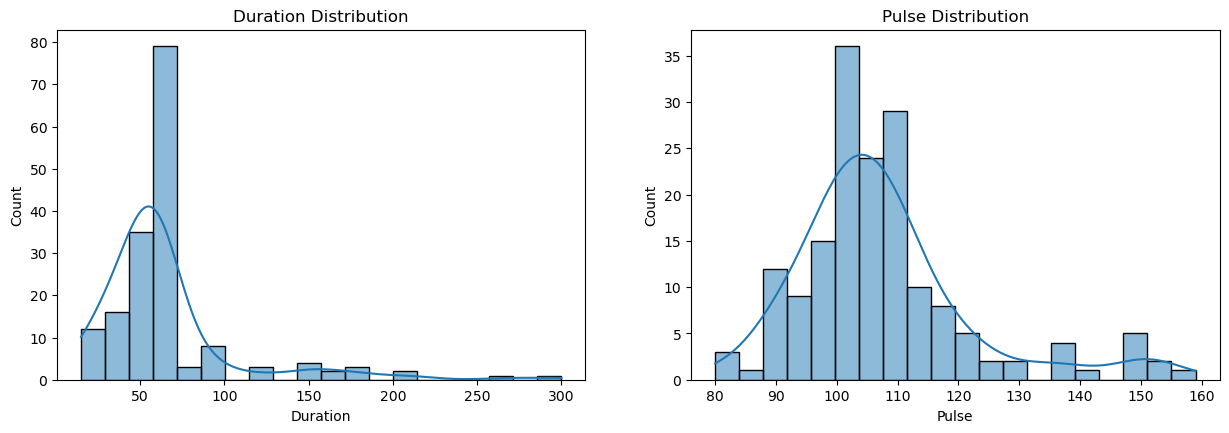

In [24]:
#histogram for duration
#set up the figure size
plt.figure(figsize=(15,10))

#Histogram for Duration
plt.subplot(2, 2, 1) 
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title('Duration Distribution')

#Histogram for Pulse
plt.subplot(2, 2, 2)
sns.histplot(df['Pulse'], bins=20, kde=True)
plt.title('Pulse Distribution')

Text(0.5, 1.0, 'Calories Distribution')

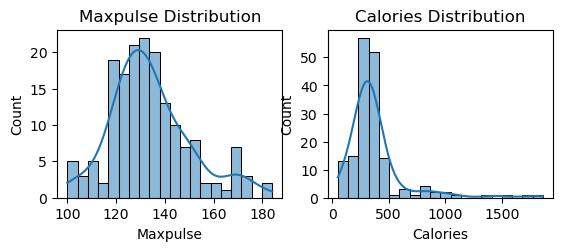

In [26]:
#EXERCISE: Plot for maxpulse and colories for histogram
#Histogram for Maxpulse
plt.subplot(2, 2, 3)
sns.histplot(df['Maxpulse'], bins=20, kde=True)
plt.title('Maxpulse Distribution')

#Histogram for Calories
plt.subplot(2, 2, 4)
sns.histplot(df['Calories'], bins=20, kde=True)
plt.title('Calories Distribution')

Text(0.5, 1.0, 'Pulse vs Calories')

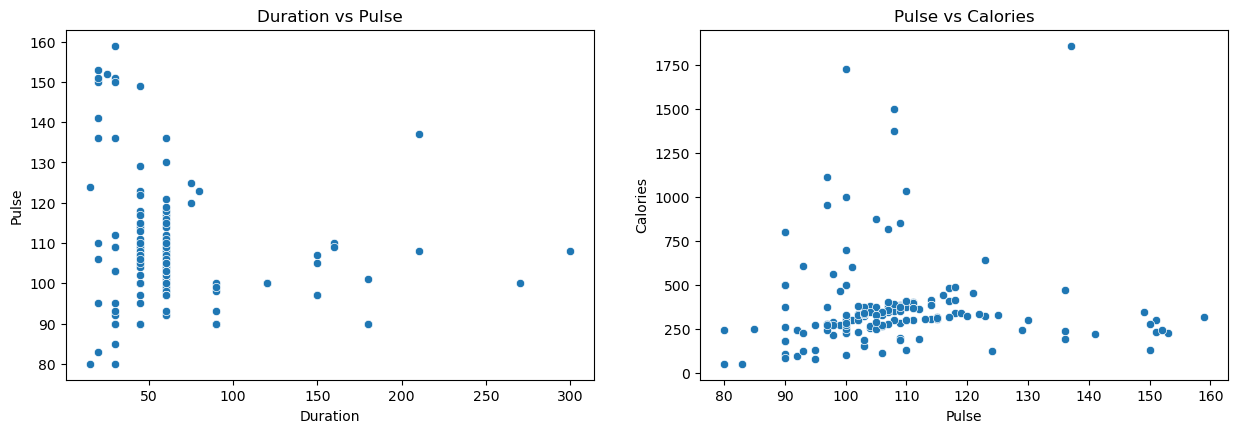

In [27]:
#Scatter plot of Duration and Pulse
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Duration', y='Pulse', data=df)
plt.title('Duration vs Pulse')
#Scatter plot of "Pulse"
plt.subplot(2, 2, 2)
sns.scatterplot(x='Pulse', y='Calories', data=df)
plt.title('Pulse vs Calories')


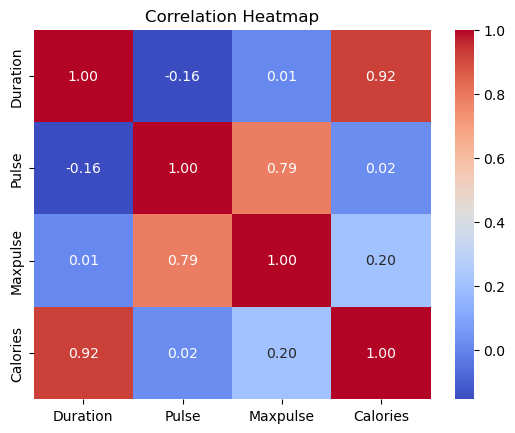

In [28]:
#Correlation using heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()